# PCA

- PCA (Principle Component Analysis) finds directions of maximum variances
- The first principal component of the data is the direction in which the data varies the most


In [43]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix

warnings.filterwarnings("ignore", category=FutureWarning)

# Read the data
seeds_df = pd.read_csv("datasets/Grains/seeds-width-vs-length.csv", header=None)
wiki_df = pd.read_csv("datasets/Wikipedia/wikipedia-vectors.csv", index_col=0)
print(seeds_df.shape)
seeds = seeds_df.values
articles = csr_matrix(wiki_df.transpose())
titles = list(wiki_df.columns)
print(wiki_df.shape)

(210, 2)
(13125, 60)


## Pearson Correlation


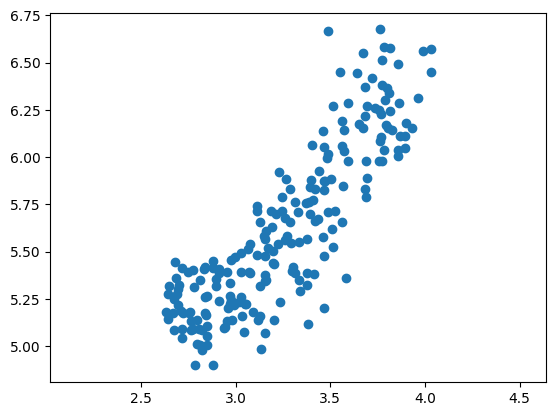

0.8604149377143469


In [31]:
# Assign the 0th column of grains: width
width = seeds[:, 0]

# Assign the 1st column of grains: length
length = seeds[:, 1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis("equal")
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

## Decorrelate data using PCA


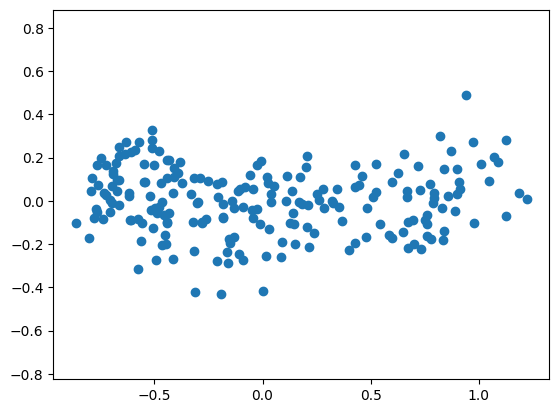

8.933825901280557e-17


In [32]:
# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(seeds)

# Assign 0th column of pca_features: xs
xs = pca_features[:, 0]

# Assign 1st column of pca_features: ys
ys = pca_features[:, 1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis("equal")
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

# Intrensic Dimension

- PCA identify Intrensic dimension
- Intrensic dimension = number of PCA features with significant variances


## Find the first principle component

- The first principal component of the data is the direction in which the data varies the most
- The principal components obtained from the fitted PCA model are printed. These are the eigenvectors that represent the directions of maximum variance in the dataset.


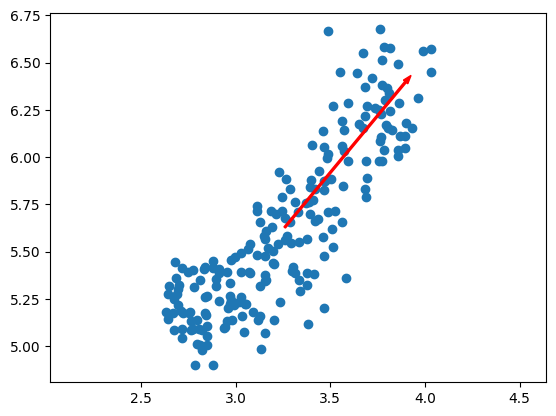

In [33]:
# Make a scatter plot of the untransformed points
plt.scatter(seeds[:, 0], seeds[:, 1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(seeds)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0, :]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color="red", width=0.01)

# Keep axes on same scale
plt.axis("equal")
plt.show()

## Variance of the PCA features

- This Example has 1 intrensic dimension, the one with the largest variance


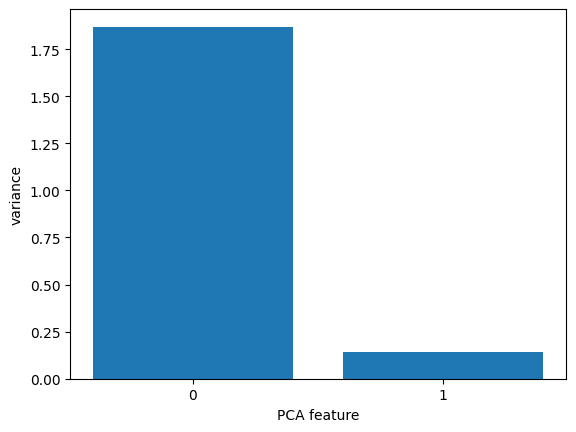

In [34]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(seeds)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel("PCA feature")
plt.ylabel("variance")
plt.xticks(features)
plt.show()

# Dimension Reduction with PCA


In [35]:
# Create a PCA model with 1 components: pca
pca = PCA(n_components=1)

# Fit the PCA instance to the scaled samples
pca.fit(seeds)

# Transform the scaled samples: pca_features
pca_features = pca.transform(seeds)

# Print the shape of pca_features
print(pca_features.shape)

(210, 1)


## TruncatedSVD


In [39]:
# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({"label": labels, "article": titles})

# Display df sorted by cluster label
print(df.sort_values("label"))

    label                                        article
0       0                                       HTTP 404
1       0                                 Alexa Internet
2       0                              Internet Explorer
3       0                                    HTTP cookie
6       0                    Hypertext Transfer Protocol
8       0                                        Firefox
35      1                Colombia national football team
34      1                             Zlatan Ibrahimović
33      1                                 Radamel Falcao
32      1                                   Arsenal F.C.
31      1                              Cristiano Ronaldo
30      1                  France national football team
38      1                                         Neymar
39      1                                  Franck Ribéry
36      1              2014 FIFA World Cup qualification
37      1                                       Football
41      2                      